# Exploratory Data Analysis

In this notebook we'll do some exploratory data analysis over our dataset. However, since we don't have our features created yet, we cannot do much at this point. In addition, when we create them, we won't be able to extract many insights because of the nature of text-based features. For this reason, only a shallow analysis will be done at this point.

For the plots we have used `seaborn` and `altair`. `altair` is a package which allows us to plot graphics with a simple grammar as we would do in ggplot2 or Tableau. It also provides easy-to-make interactive plots. For further information please visit the project site: https://altair-viz.github.io/.

To install it, please type this command in the shell:

`! conda install -c conda-forge altair vega_datasets notebook vega`

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
sns.set_style("whitegrid")
import altair as alt
#alt.renderers.enable("notebook")
# Code for hiding seaborn warnings
import warnings
warnings.filterwarnings("ignore")

Loading the dataset:

In [25]:
df_path = "/Users/keerthanareddy/Downloads/Latest-News-Classifier-master/0. Latest News Classifier/01. Dataset Creation/"
df_path2 = df_path + 'News_dataset.csv'
df = pd.read_csv(df_path2, sep=';')

In [26]:
df.head()

,File_Name,Content,Category,Complete_Filename
0,Lahari_Assg1.txt,Ask nine futurists what life will be like in 5...,Alto,Lahari_Assg1.txt-Alto
1,Lahari_Assg2.txt,From ushering in an era of decreased car owner...,Ferrari,Lahari_Assg2.txt-Ferrari


### Number of articles in each category

In [27]:
bars = alt.Chart(df).mark_bar(size=50).encode(
 x=alt.X("Category"),
 y=alt.Y("count():Q", axis=alt.Axis(title='Number of articles')),
 tooltip=[alt.Tooltip('count()', title='Number of articles'), 'Category'],
 color='Category'
)
text = bars.mark_text(
 align='center',
 baseline='bottom',
).encode(
 text='count()'
)
(bars + text).interactive().properties(
 height=300,
 width=700,
 title = "Number of articles in each category",
)

alt.LayerChart(...)

### % of articles in each category

In [28]:
df['id'] = 1
df2 = pd.DataFrame(df.groupby('Category').count()['id']).reset_index()

bars = alt.Chart(df2).mark_bar(size=50).encode(
    x=alt.X('Category'),
    y=alt.Y('PercentOfTotal:Q', axis=alt.Axis(format='.0%', title='% of Articles')),
    color='Category'
).transform_window(
    TotalArticles='sum(id)',
    frame=[None, None]
).transform_calculate(
    PercentOfTotal="datum.id / datum.TotalArticles"
)

text = bars.mark_text(
    align='center',
    baseline='bottom',
    #dx=5  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text=alt.Text('PercentOfTotal:Q', format='.1%')
)

(bars + text).interactive().properties(
    height=300, 
    width=700,
    title = "% of articles in each category",
)

alt.LayerChart(...)

The classes are approximately balanced. We'll first try to train the models without oversampling/undersampling. If we see some bias in the model, we'll use these techniques.

### News length by category

Definition of news length field. Although there are special characters in the text (``\r, \n``), it will be useful as an approximation.

In [29]:
df['News_length'] = df['Content'].str.len()

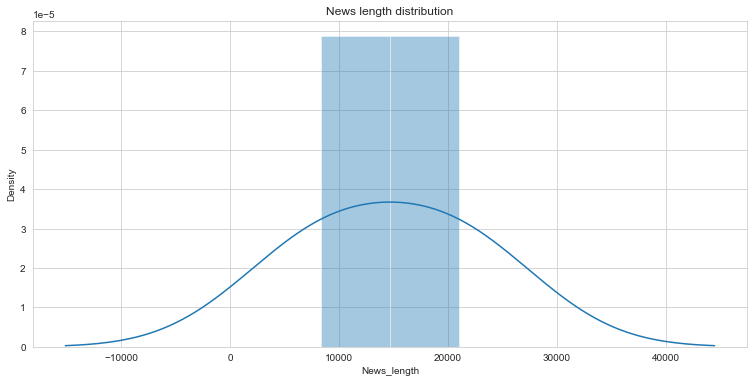

In [30]:
plt.figure(figsize=(12.8,6))
sns.distplot(df['News_length']).set_title('News length distribution');

In [31]:
df['News_length'].describe()

count        2.00000
mean     14674.00000
std       8976.01348
min       8327.00000
25%      11500.50000
50%      14674.00000
75%      17847.50000
max      21021.00000
Name: News_length, dtype: float64

Let's remove from the 95% percentile onwards to better appreciate the histogram:

In [32]:
quantile_95 = df['News_length'].quantile(0.95)
df_95 = df[df['News_length'] < quantile_95]

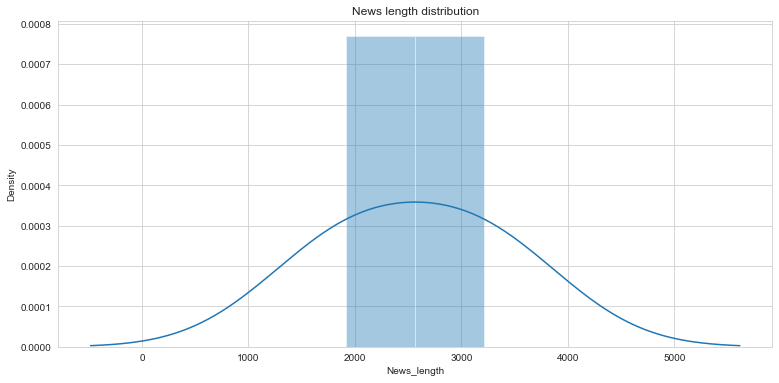

In [18]:
plt.figure(figsize=(12.8,6))
sns.distplot(df_95['News_length']).set_title('News length distribution');

We can get the number of news articles with more than 10,000 characters:

In [33]:
df_more10k = df[df['News_length'] > 1000]
len(df_more10k)

2

Let's see one:

In [34]:
df_more10k['Content'].iloc[0]

'Ask nine futurists what life will be like in 50 years and you\'re liable to get a dozen answers, but that doesn\'t mean it isn\'t worth thinking about. For the car enthusiast, thinking about anything beyond the next 10 years or so means thinking, at least in part, about self-driving cars. And part of thinking about self-driving cars is wondering how they might change the way we live.\r\n\r\nIf you look back 15 years or so, before the smartphone went mainstream, it\'s easy to see how a small differenceâ€”one small deviceâ€”can have a monumental and lasting impact; in the smartphone\'s case, it was spawning the always-on, social-media-fueled barrage of technology now plaguing pockets and purses everywhere. Looking around today, Tesla Motors is the most valuable carmaker in the world, and it\'s not because it\'s wildly profitable, or even profitable at all. It\'s because investors are betting on the future, and they think the future will be electric and autonomous. They\'re not alone.\r\

It's just a large news article.

Let's now plot a boxplot:

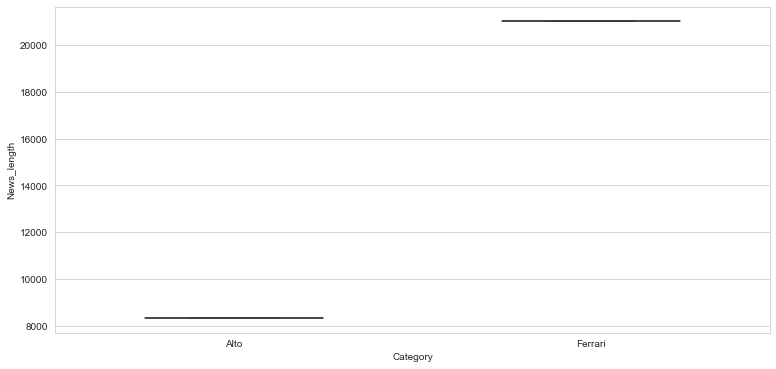

In [35]:
plt.figure(figsize=(12.8,6))
sns.boxplot(data=df, x='Category', y='News_length', width=.5);

Now, let's remove the larger documents for better comprehension:

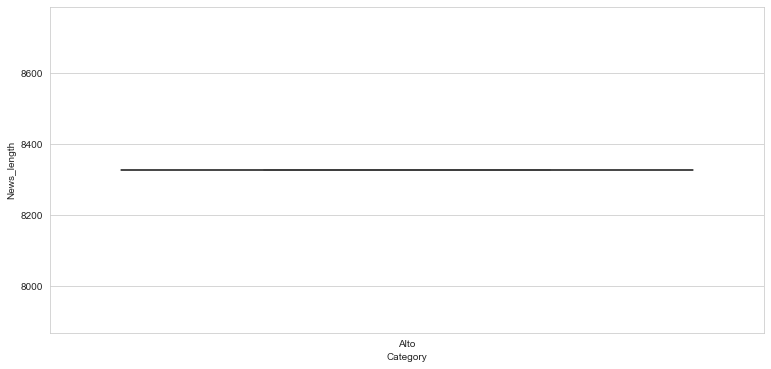

In [36]:
plt.figure(figsize=(12.8,6))
sns.boxplot(data=df_95, x='Category', y='News_length');

We can see that, although the length distribution is different for every category, the difference is not too big. If we had way too different lengths between categories we would have a problem since the feature creation process may take into account counts of words. However, when creating the features with TF-IDF scoring, we will normalize the features just to avoid this.

At this point, we cannot do further Exploratory Data Analysis. We'll turn onto the **Feature Engineering** section.

We'll save the dataset:

In [37]:
with open('News_dataset.pickle12', 'wb') as output:
    pickle.dump(df, output)